## 5.7 Supervised Learning

粗略地说, 监督学习就是学习将一些输入关联到输出(训练集中的输出往往是人类监督者(supervisor)搜集的).


### 5.7.1 Probabilistic Supervised Learning

大部分监督学习算法都是基于估计参数化分布函数族 $p(y | \boldsymbol{x}; \boldsymbol{\theta})$, 其中参数 $\boldsymbol{\theta}$ 可以用 MLE 去估计.

例如线性回归就相当于去估计 $p(y | \boldsymbol{x}; \boldsymbol{\theta}) = \mathcal{N}(y; \boldsymbol{\theta}^\top \boldsymbol{x}, \boldsymbol{I})$

线性回归可以通过定义一族其他的概率分布来泛化为分类器.

#### Logistic regression(用于分类器)

一种方法就是通过 logistic sigmoid function 把线性函数的输出压扁成区间 $(0,1)$ 并且推断其值的概率

$$p(y = 1 | \boldsymbol{x}; \boldsymbol{\theta}) = \sigma(\boldsymbol{\theta}^\top \boldsymbol{x})$$

在线性回归中, 我们只需要解一下 `normal equation(形如 $Ax = b$ )` 就可以得出最优的参数值, 而 Logistic regression 的最优参数值没有 `闭解(closed-form solution, i.e., 数值解)`, 不过我们可以通过 `梯度下降(gradient descent)` 来最小化 `负对数似然(negative log-likelihood, abbr., NLL)`

### 5.7.2 SVM (Support Vector Machine, 支持向量机)

SVM 和 logistic regression 一样是由线性函数 $\boldsymbol{w}^\top \boldsymbol{x} + b$ 驱动, 只不过不会给出概率分布, 而是只输出类别(如果线性函数的值是负数那就输出负类别(i.e., -1), 如果是正数就输出正类别(i.e., +1)).

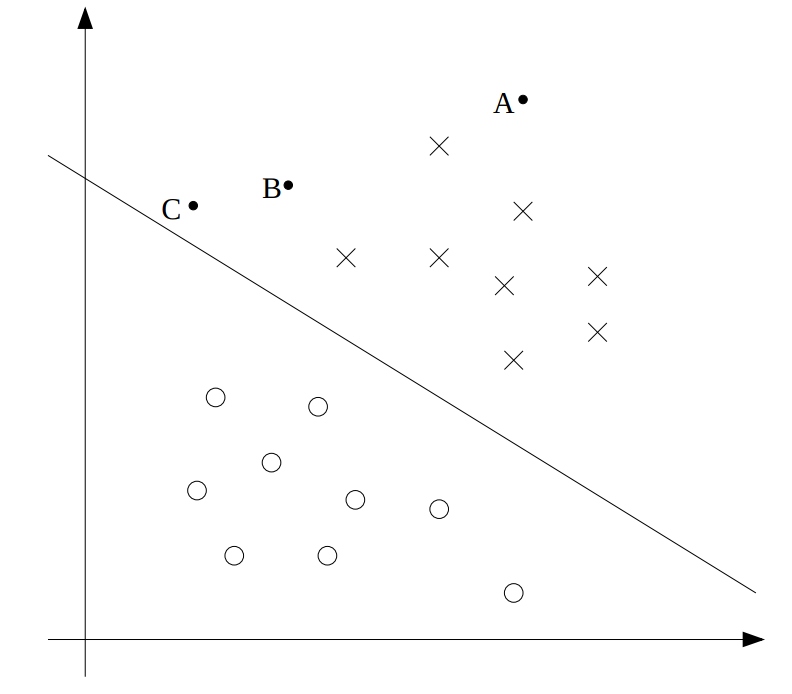

我们知道 logistic regression 在给出类别的同时还会给出其值的概率分布, 也就是说, 可以计算其置信度(confidence). 例如像上图, A, B, C 按照相对于 $\boldsymbol{\theta}^\top \boldsymbol{x} = 0$ 这条 `separating hyperplane(or, decision boundary)` 的位置由远到近, 所以其置信度也可以直观得感觉出是由大到小.

> 换句话说, 如果 $\theta^\top x >> 0$, 那么就有很大的置信度说明 $y = 1$

**Functional and geometric margins(函数间隔和集合间隔)**

为了在 SVM 上也能有类似于 logistic regression 的置信值, 引入两种 margins

* functional margin


Given a training example $(x^{(i)}, y^{(i)})$ , the functional margin of $(w, b)$ with respect to the training example is

$$\hat{\gamma}^{(i)} = y^{(i)}(\boldsymbol{w}^\top \boldsymbol{x} + b)$$

如果 $y^{(i)} = 1$, 为了使得 functional margin 很大, 我们需要 $w^\top x + b$ 是一个很大的正数; 如果 $y^{(i)} = -1$ 就需要是一个很大的负数.

但是不管是用 $(w, b)$ 还是用 $(2w, 2b)$ (乘以一个正系数), SVM 的输出不会受任何影响(因为SVM的输出只跟符号有关)而 functional margin 就会变大, 这一点说明 functional margin 也不是一个很好的置信值测量工具.

* geometric margin

我们直到 $w$ 就是 hyperplane 的正交向量, 我们可以知道点 $x^{(i)} - \gamma^{(i)} \cdot \boldsymbol{w} / \lVert \boldsymbol{w} \rVert$ 就在 hyperplane 上

$$\boldsymbol{w}^\top \left(\boldsymbol{x}^{(i)} - \gamma^{(i)} \frac{\boldsymbol{w}}{\lVert \boldsymbol{w} \rVert} \right) + b = 0$$

可以解得

$$\gamma^{(i)} = \left( \frac{\boldsymbol{w}}{\lVert \boldsymbol{w} \rVert} \right)^\top \boldsymbol{x}^{(i)} + \frac{b}{\lVert \boldsymbol{w} \rVert}$$

所以我们可以定义其集合间隔

$$\gamma_G^{(i)} = y^{(i)} \left( \left( \frac{\boldsymbol{w}}{\lVert \boldsymbol{w} \rVert} \right)^\top \boldsymbol{x}^{(i)} + \frac{b}{\lVert \boldsymbol{w} \rVert}\right)$$

functional 就是 geometric margin 在 $\lVert w \rVert = 0$ 的时候的特化.

定义最小 margin

$$\gamma = \min_i \gamma^{(i)}$$

**The optimal margin classifier**

要使最小的 functional margin 和 geometric margin 都最大化

$$\max_{\gamma, \boldsymbol{w}, b} \gamma \\
s.t. \quad y^{(i)} (\boldsymbol{w}^\top x^{(i)} + b) \ge \gamma, i = 1, ..., m \\
\lVert \boldsymbol{w} \rVert = 1$$

然而条件 $\lVert \boldsymbol{w} \rVert = 1$ 是 non-convex 的, 没法优化.

SVM 的一个重要革新就是 **核技巧(kernel trick)**.